# Heart disease detection
In this notebook, the heart dataset (https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1) is used to predict if a patient have a heart disease.
Multiple machine learning technics will be used to find the method that gives the highest accuracy in hear disease prediction.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Data loading and data exploration

In [48]:
df = pd.read_csv("./dataset/heart.csv")
df.dropna()
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [50]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


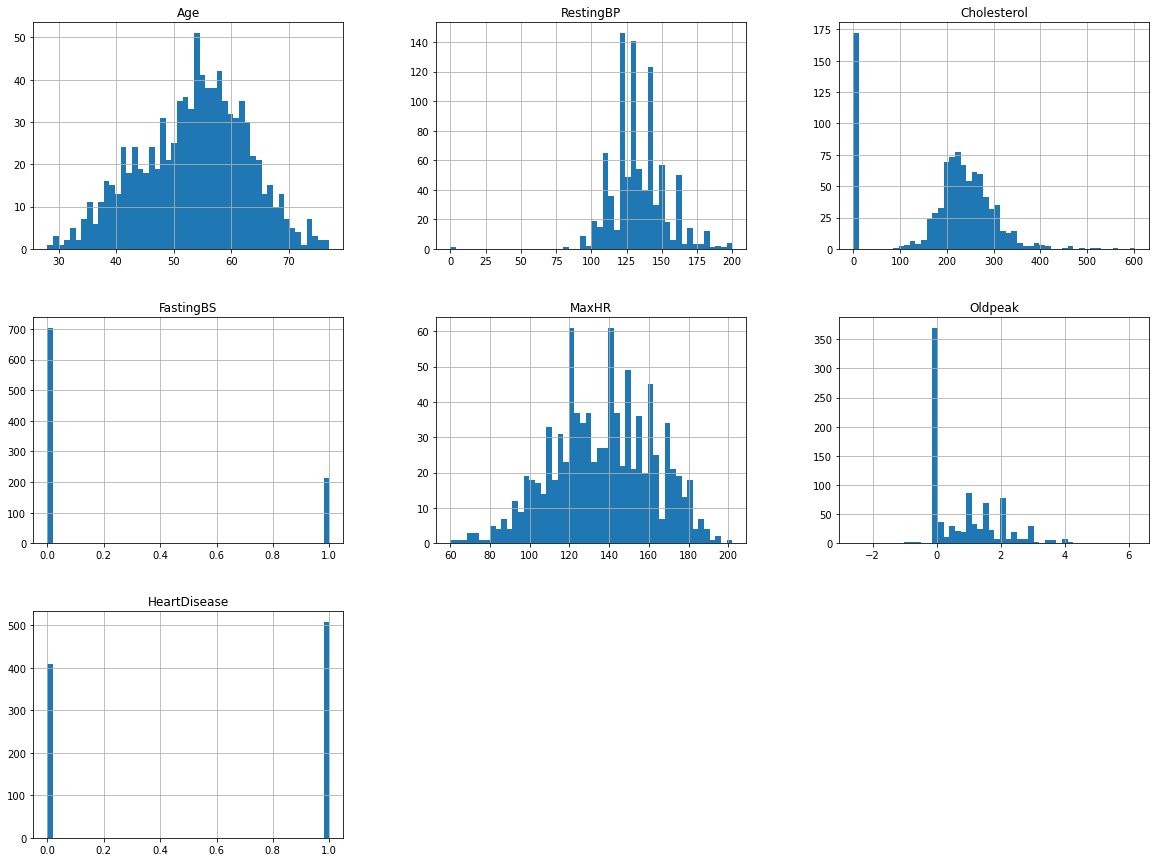

In [51]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Part 1: Bayesian classification
In this part, the gaussian bayesian classifier is used to get some metrics of different columns of the dataset to know if they allow to detect a heart disease.

In [52]:
# Create different combinaison to check if their is a correlation
age_bp_dict = {"Age" : df['Age'], "RestingBP" : df['RestingBP']}
age_bp_df = pd.DataFrame(age_bp_dict)

age_op_dict = {"Age" : df['Age'], "Oldpeak" : df['Oldpeak']}
age_op_df = pd.DataFrame(age_op_dict)

chol_bp_dict = {"Cholesterol" : df['Cholesterol'], "RestingBP" : df['RestingBP']}
chol_bp_df = pd.DataFrame(chol_bp_dict)

hr_bp_dict = {"MaxHR" : df['MaxHR'], "RestingBP" : df['RestingBP']}
hr_bp_df = pd.DataFrame(hr_bp_dict)

hr_op_dict = {"MaxHR" : df['MaxHR'], "Oldpeak" : df['Oldpeak']}
hr_op_df = pd.DataFrame(hr_op_dict)

bp_op_dict = {"RestingBP" : df['RestingBP'], "Oldpeak" : df['Oldpeak']}
bp_op_df = pd.DataFrame(bp_op_dict)

hr_chol_dict = {"Max_HR" : df['MaxHR'], "Cholesterol" : df['Cholesterol']}
hr_chol_df = pd.DataFrame(hr_chol_dict)

hr_age_dict = {"Max_HR" : df['MaxHR'], "Age" : df['Age']}
hr_age_df = pd.DataFrame(hr_age_dict)

disease_dict = {"HeartDisease" : df['HeartDisease']}
disease_df = pd.DataFrame(disease_dict)

In [53]:
def gaussian_bayes(input_df):
    X_train, X_test, y_train, y_test = train_test_split(input_df, disease_df, test_size=0.20, random_state=42)
    gnb = GaussianNB()
    history = gnb.fit(X_train, np.ravel(y_train))
    y_pred = history.predict(X_test)
    print(input_df.columns[0] + " and " + input_df.columns[1])
    print("normalized accuracy score = " + str(accuracy_score(y_test, y_pred)))
    print("accuracy score = " + str(accuracy_score(y_test, y_pred, normalize=False)))
    print("precision score = " + str(precision_score(y_test, y_pred, average='macro', zero_division=True)))


In [54]:
gaussian_bayes(age_bp_df)

Age and RestingBP
normalized accuracy score = 0.5706521739130435
accuracy score = 105
precision score = 0.5596274794388002


In [55]:
gaussian_bayes(chol_bp_df)

Cholesterol and RestingBP
normalized accuracy score = 0.6086956521739131
accuracy score = 112
precision score = 0.6492194674012857


In [56]:
gaussian_bayes(hr_bp_df)

MaxHR and RestingBP
normalized accuracy score = 0.657608695652174
accuracy score = 121
precision score = 0.6529425723777884


In [57]:
gaussian_bayes(hr_chol_df)

Max_HR and Cholesterol
normalized accuracy score = 0.657608695652174
accuracy score = 121
precision score = 0.6614583333333333


In [58]:
gaussian_bayes(hr_age_df)

Max_HR and Age
normalized accuracy score = 0.657608695652174
accuracy score = 121
precision score = 0.6505260640841702


In [59]:
gaussian_bayes(age_op_df)

Age and Oldpeak
normalized accuracy score = 0.6956521739130435
accuracy score = 128
precision score = 0.7083782811938151


In [60]:
gaussian_bayes(hr_op_df)

MaxHR and Oldpeak
normalized accuracy score = 0.6956521739130435
accuracy score = 128
precision score = 0.6931992903607332


In [61]:
gaussian_bayes(bp_op_df)

RestingBP and Oldpeak
normalized accuracy score = 0.625
accuracy score = 115
precision score = 0.6532581453634085


Mutiple combinations have been tried, the data that offers the best correlation to detecte heart disease with the gaussian bayes classifier are the age and the oldpeak of the patient.

## Part 2: clustering
For the next step, clustering algorithms will be use on age and oldpeak data to predict a heart disease.

### K-means clustering
K-means clustering is used with the age and the oldpeak of the patients.

In [62]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(age_op_df, disease_df, test_size=0.20, random_state=42)
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

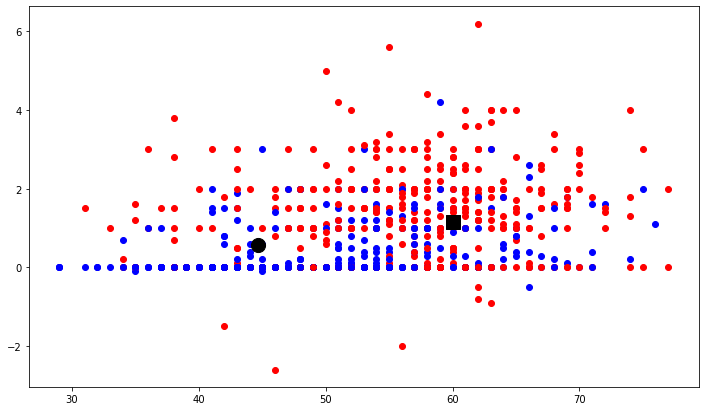

In [63]:
# Display the traning data and the centroids found by the K-means clustering algorithme
y_train_array = list()
for i in y_train.index:
    y_train_array.append(y_train.at[i, 'HeartDisease'])

j = 0
color = 'blue'

plt.figure(figsize=(12,7))
for i in X_train.index:
    if y_train_array[j] == 0:
        color = 'blue'
    elif y_train_array[j] == 1:
        color = 'red'
    
    plt.scatter(x=X_train.at[i, 'Age'], y=X_train.at[i, 'Oldpeak'], color=color)
    j += 1

plt.scatter(x=kmeans.cluster_centers_[0][0], y=kmeans.cluster_centers_[0][1], s=200, c='black', marker= 's')
plt.scatter(x=kmeans.cluster_centers_[1][0], y=kmeans.cluster_centers_[1][1], s=200, c='black', marker= 'o')
plt.show

In [64]:
k_means_prediction =  kmeans.predict(X_test)
print("normalized accuracy score = " + str(accuracy_score(y_test, k_means_prediction)))

normalized accuracy score = 0.41847826086956524


It seems that the accuracy obtained with k-means clustering alogrithms is way lower than the accuracy obtained with the gaussian bayes classifier. Visualisation of the prediction and test data will help us understand why.

In [65]:
def plot_clusters(label_array):
    j = 0
    color = 'blue'
    plt.figure(figsize=(12,7))
    for i in X_test.index:
        if label_array[j] == 0:
            color = 'blue'
        elif label_array[j] == 1:
            color = 'red'
        
        plt.scatter(x=X_test.at[i, 'Age'], y=X_test.at[i, 'Oldpeak'], color=color)
        j += 1

In [66]:
# converting y_test to a list
y_test_array = list()
for i in y_test.index:
    y_test_array.append(y_test.at[i, 'HeartDisease'])

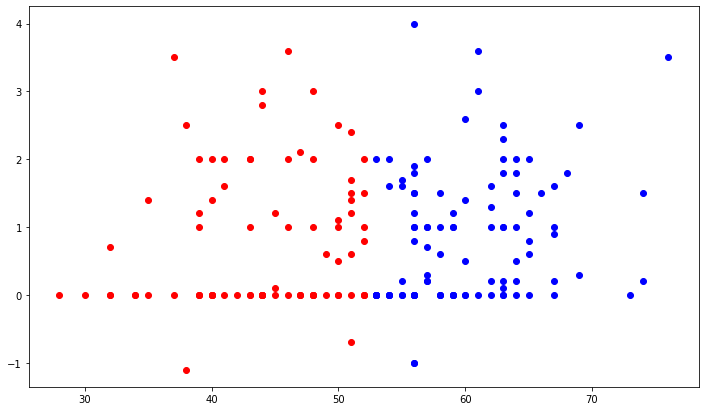

In [67]:
plot_clusters(k_means_prediction)

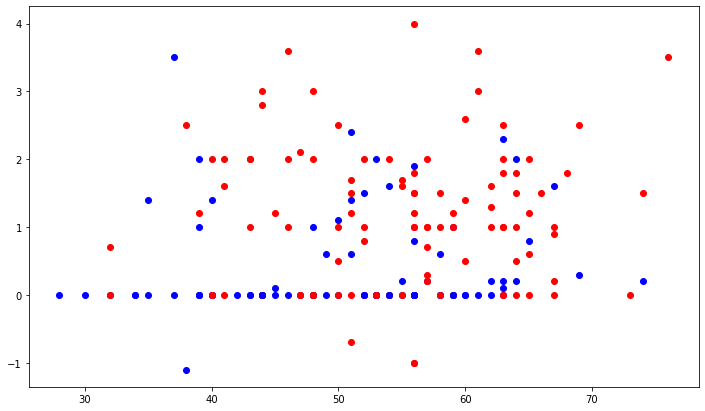

In [68]:
plot_clusters(y_test_array)

The plots allows to see clearly the differences between the predictions of the K-means algorithme and the real values.

### Gaussian mixture model (GMM)
GMM clustering is used with the age and the oldpeak of the patients.

In [69]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state = 42).fit(X_train)
gmm_prediction = gmm.predict(X_test)
print("normalized accuracy score = " + str(accuracy_score(y_test, gmm_prediction)))

normalized accuracy score = 0.33152173913043476


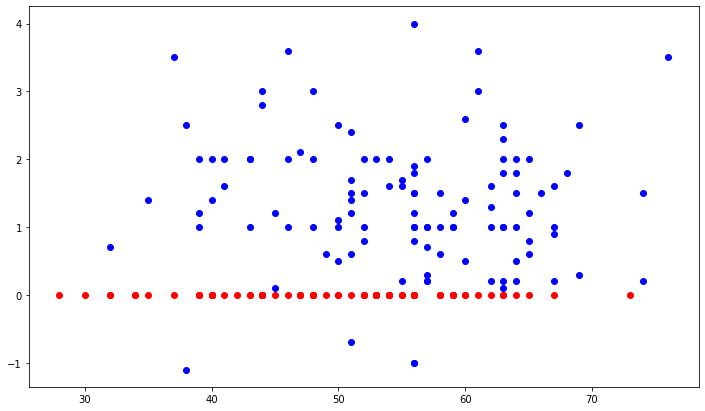

In [70]:
plot_clusters(gmm_prediction)

A clear difference of performance can be observed between the K-means clustering algorithm and the GMM algorithm, the K-means clustering algorithm seems to be more efficient for this dataset. The plots of those two alogorithms on the dataset allows to observe that they work differently.

## Finding the good number of cluster with the Elbow method

In [71]:
distortions = []
for k in range(1,10):
    elbow_kmean = KMeans(n_clusters=k).fit(X_train)
    distortions.append(elbow_kmean.inertia_)

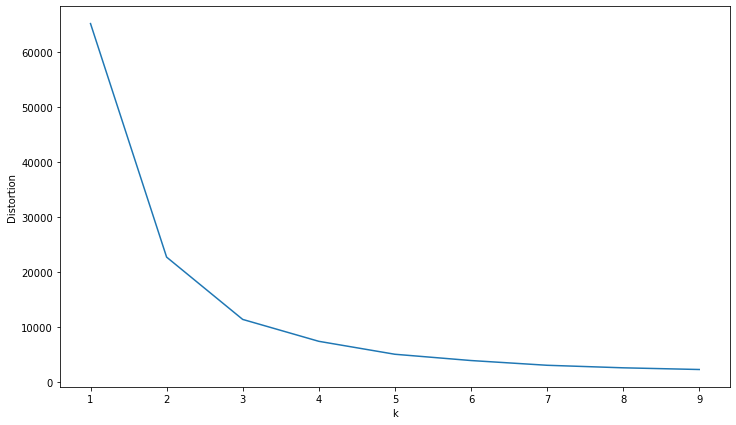

In [72]:
plt.figure(figsize=(12,7))
plt.plot(range(1,10), distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

The elbow is at 2. So the optimal number of cluster for this dataset is 2. If the k-means clustering algorithm is fitted on this dataset with another number of cluster, the performance will decrease.

In [73]:
three_kmeans = KMeans(n_clusters = 3, random_state = 42).fit(X_train)
three_k_means_prediction =  three_kmeans.predict(X_test)
print("normalized accuracy score = " + str(accuracy_score(y_test, three_k_means_prediction)))

normalized accuracy score = 0.28804347826086957


According to the results showed by the accuracy scores and the plots, even if the k-means clustering algorithm does not give good performance on this dataset, the k-means clustering algorithm is still giving better results than the GMM algorithm. This is probably due to the large amount of noisy data in the dataset.
When the results of clustering algorithms and gaussain bayes classifier are compared, the accuracy scores show that the gaussian bayes classifier is much more efficient to detect heart disease in this dataset.

## Part 3: Supervised learning with decision trees

In [74]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [75]:
number_df = df.select_dtypes(['number']).copy()
number_df.drop('HeartDisease', inplace = True, axis=1)
number_df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


## Comparing results of decision trees with differents datasets
Obtaning metrics from decision trees trained with dataset obtained with the train_test_split() and with KFold to compare them.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(number_df, disease_df, test_size=0.20, random_state=42)
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.85714286 0.82312925 0.78231293 0.74829932 0.78082192]


In [77]:

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(number_df)

print(kf)

for train_index, test_index in kf.split(number_df):
    X_train_fold, X_test_fold = number_df.iloc[train_index, :], number_df.iloc[test_index, :]
    y_train_fold, y_test_fold = disease_df.iloc[train_index, :], disease_df.iloc[test_index, :]


KFold(n_splits=10, random_state=42, shuffle=True)


In [78]:
clf_fold = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=3, min_samples_leaf=5).fit(X_train_fold, y_train_fold)

### Plot decision trees 

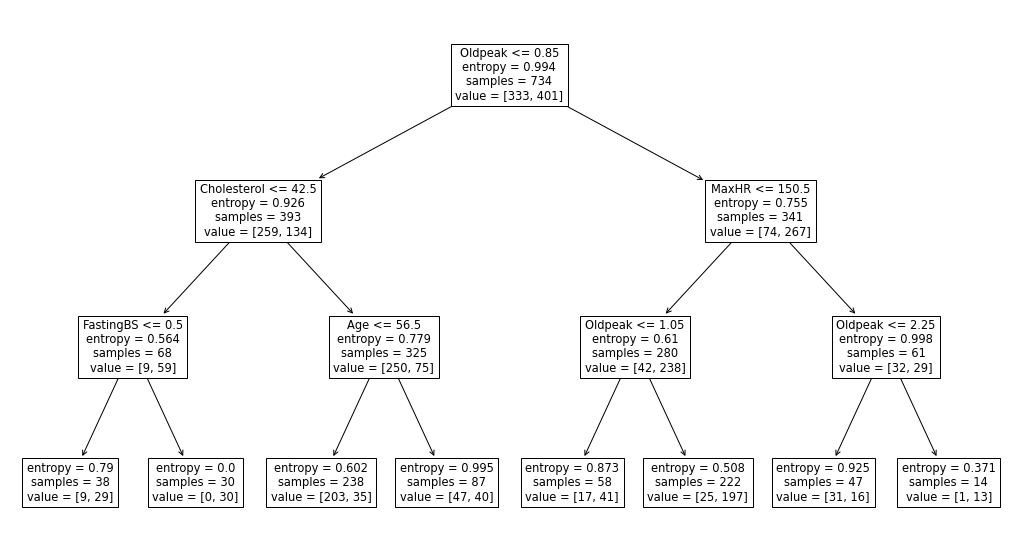

In [79]:
plt.figure(figsize=(18,10))
tree.plot_tree(clf, feature_names=("Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"))
plt.show()

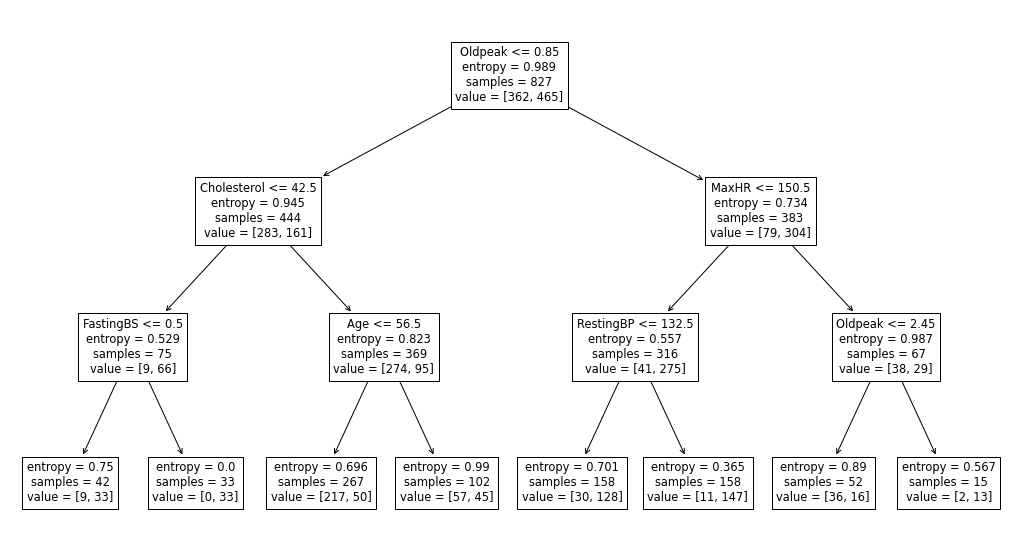

In [80]:
plt.figure(figsize=(18,10))
tree.plot_tree(clf_fold, feature_names=("Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"))
plt.show()

### Print metrics

In [81]:
def print_metrics(prediction, y_test):
    print("normalized accuracy score = " + str(accuracy_score(y_test, prediction)))
    print("precision score = " + str(precision_score(y_test, prediction, average='macro', zero_division=True)))
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    tn = tn * 100 / y_test.size
    fp = fp * 100 / y_test.size
    fn = fn * 100 / y_test.size
    tp = tp * 100 / y_test.size
    print("true negative = " + str(tn) + "%, false positive = " + str(fp) + "%, false negative = " + str(fn) + "%, true positive = " + str(tp) + "%")
    print("recall score = " + str(recall_score(y_test, prediction)))
    print("f1 score = " + str(f1_score(y_test, prediction)))

In [82]:
prediction = clf.predict(X_test)

print_metrics(prediction, y_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("roc auc score = " + str(roc_auc_score(y_test, y_pred_proba)))

normalized accuracy score = 0.7663043478260869
precision score = 0.7682033096926714
true negative = 34.78260869565217%, false positive = 7.065217391304348%, false negative = 16.304347826086957%, true positive = 41.84782608695652%
recall score = 0.719626168224299
f1 score = 0.7817258883248731
roc auc score = 0.7908119917465712


In [83]:
prediction = clf_fold.predict(X_test_fold)

print_metrics(prediction, y_test_fold)
y_pred_proba_fold = clf_fold.predict_proba(X_test_fold)[:, 1]
print("roc auc score = " + str(roc_auc_score(y_test_fold, y_pred_proba_fold)))


normalized accuracy score = 0.7582417582417582
precision score = 0.7579710144927536
true negative = 39.56043956043956%, false positive = 13.186813186813186%, false negative = 10.989010989010989%, true positive = 36.26373626373626%
recall score = 0.7674418604651163
f1 score = 0.7499999999999999
roc auc score = 0.8444767441860465


### Plot the ROC curves

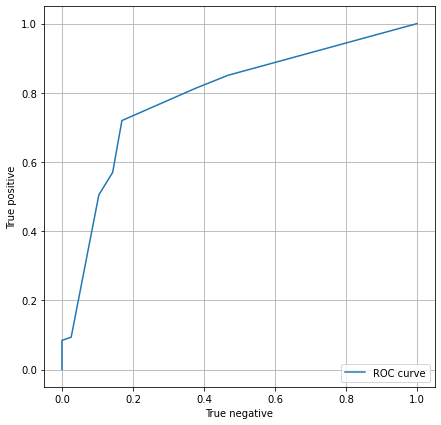

In [84]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(7, 7))
plt.plot(fpr,tpr,label="ROC curve")
plt.ylabel("True positive")
plt.xlabel("True negative")
plt.legend(loc=4)
plt.grid(True)
plt.show()

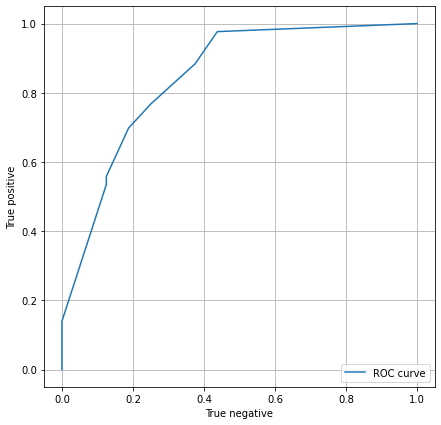

In [85]:
y_pred_proba = clf_fold.predict_proba(X_test_fold)[::,1]
fpr_fold, tpr_fold, _ = metrics.roc_curve(y_test_fold,  y_pred_proba_fold)
auc = metrics.roc_auc_score(y_test_fold, y_pred_proba_fold)
plt.figure(figsize=(7, 7))
plt.plot(fpr_fold,tpr_fold,label="ROC curve")
plt.ylabel("True positive")
plt.xlabel("True negative")
plt.legend(loc=4)
plt.grid(True)
plt.show()

Pinting the metrics and ploting the ROC curve shows a little difference between the classic dataset and the dataset obtained with 10 folds.
Indeed, the differents metrics printed above tends to show that both datasets offers great performance in heart disease detection.
Those great performance allows to conclude that the decision trees generalize well to new data.

### Experimenting decision trees parameters

Experimenting multiple values for the depth of the decision trees shows that a depth within 2 and 4 offer approximatively the same performance, but beyond 4, the performance of the decision tree is only decreasing.
Experimenting different split node strategies shows that the "best" split strategy gives better performance than the "random" split strategy. Changing minimum sample split is decreasing the performance only with high number, performance are not influenced bellow 500.
Experimenting multiple value for the minimum smaple leaf show that the performance start decreasing for a number superior to ~75.

# Part 4: Neural networks

In [86]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.neural_network import MLPClassifier

In [87]:
number_df = df.select_dtypes(['number']).copy()
number_df.drop('FastingBS', inplace = True, axis=1)
number_df.drop('HeartDisease', inplace = True, axis=1)
number_df.head(5)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


## Linear regression

In [88]:
X_train, X_test, y_train, y_test = train_test_split(number_df, disease_df, test_size=0.20, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(number_df)

for train_index, test_index in kf.split(number_df):
    X_train_fold, X_test_fold = number_df.iloc[train_index, :], number_df.iloc[test_index, :]
    y_train_fold, y_test_fold = disease_df.iloc[train_index, :], disease_df.iloc[test_index, :]

In [89]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
reg_fold = linear_model.LinearRegression().fit(X_train_fold, y_train_fold)
prediction = reg.predict(X_test)
prediction_fold = reg_fold.predict(X_test_fold)
print("R2 score = " + str(r2_score(y_test, prediction)))
print("explained_variance_score = " + str(explained_variance_score(y_test, prediction)))

R2 score = 0.19928498541014672
explained_variance_score = 0.21843869129206805


In [90]:
print("R2 score = " + str(r2_score(y_test_fold, prediction_fold)))
print("explained_variance_score = " + str(explained_variance_score(y_test_fold, prediction_fold)))

R2 score = 0.28345137895850425
explained_variance_score = 0.3238011593718154


The metrics show that this dataset is not linearly separable.

## Multilayer Perceptron

In [91]:
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import backend as K
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'


In [92]:
optimizer = keras.optimizers.Adam(lr=0.01)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[5]))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
23/23 [==============================] - 0s 8ms/step - loss: 34.2530 - accuracy: 0.4095 - val_loss: 3.1710 - val_accuracy: 0.5652
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1.4863 - accuracy: 0.5793 - val_loss: 1.5629 - val_accuracy: 0.5870
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8410 - accuracy: 0.6567 - val_loss: 0.9370 - val_accuracy: 0.6196
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7385 - val_loss: 0.5810 - val_accuracy: 0.7228
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.7613 - val_loss: 0.6116 - val_accuracy: 0.6957
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.7606 - val_loss: 0.6669 - val_accuracy: 0.6576
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.7227 - val_loss: 0.6233 - val_accuracy: 0.7174
Epoch 8/100


### Experimenting neural network parameters

A higher number of layers allows the recognition of higher level patterns and a better generalization. For this dataset, the best performance is btained with a neural network with 3 hidden layers with 20 neurones each.

The incresing the number of epochs is useless beyond 25, the performance won't get any better.

Concerning the learning rate, the model obtains it's best performance faster with a value between 0.01 and 0.001, a higher or a lower value will decrease the performance.